> Part 3
- In the first cell of your notebook, import the required packages with their customary aliases

In [1]:
# Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Part 4
- The original csv had two rows attached to the bottom that contained an index.
- The csv() call was modified by passing "skipfooter_2" to correct this issue. 
- The original csv file was not modified.

In [2]:
#Drop last two cells to remove index at bottom.
gdp_df = pd.read_csv('../data/Undata.csv', 
    skipfooter=2, engine='python')
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2019  2065.036398              NaN
1        Afghanistan  2018  2033.779002              NaN
2        Afghanistan  2017  2058.383832              NaN
3        Afghanistan  2016  2057.062164              NaN
4        Afghanistan  2015  2068.265904              NaN
...              ...   ...          ...              ...
6863        Zimbabwe  1994  3263.934978              NaN
6864        Zimbabwe  1993  3033.504852              NaN
6865        Zimbabwe  1992  3054.889178              NaN
6866        Zimbabwe  1991  3426.598094              NaN
6867        Zimbabwe  1990  3324.348171              NaN

[6868 rows x 4 columns]


>  Part 5
- Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'


In [3]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
print(gdp_df.head(n=1))

       Country  Year  GDP_Per_Capita
0  Afghanistan  2019     2065.036398


> Part 6
- How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.
    - There are 3 columns and 6868 rows. 
    - Dataypes are #0 - Object, #2 - int64, #3 - float64.
    - I don't think there is anything wrong with Dypes.

In [4]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB
None


> Part 7 
- Which years are represented in this dataset? 
    - The years 1990 - 2017 are represented in the dataset.
- Take a look at the number of observations per year. What do you notice?
    - The number of observations per year seems to trend upward.

In [5]:
gdp_df["Year"].value_counts().sort_index()

#.plot if your're feeling froggy

1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64

>  Part 8 
- How many countries are represented in this dataset?
    - There are 238 countries represented in the dataset.
- Which countries are least represented in the dataset?
    - Djibouti, Turks and Caicos Islands, Sint Maarten (Dutch part), Cayman Islands, and Nauru
- Why do you think these countries have so few observations?
    - Perhaps they have not been members of the UN as long as others.

In [6]:
gdp_df['Country'].value_counts()

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

> Part 9
- Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [7]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]
print(gdp_2014)

                  Country  Year  GDP_Per_Capita
5             Afghanistan  2014     2102.385234
23                Albania  2014    11623.866679
53                Algeria  2014    11512.705405
83                 Angola  2014     8239.828837
113   Antigua and Barbuda  2014    18104.241470
...                   ...   ...             ...
6727              Vietnam  2014     6098.489609
6757   West Bank and Gaza  2014     5967.073437
6783                World  2014    15189.648507
6813               Zambia  2014     3450.046561
6843             Zimbabwe  2014     2955.240287

[238 rows x 3 columns]


> Part 10
- Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [8]:
gdp_2014["GDP_Per_Capita"].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

> Part 11
- Create a histogram of GDP Per Capita numbers for 2014 
- How would you describe the shape of the distribution?
    - The distribution appears to be skewed to the right

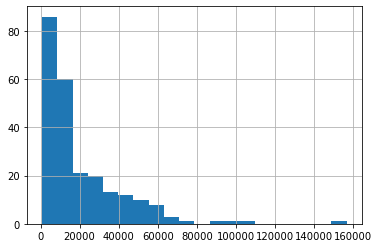

In [9]:
gdp_2014["GDP_Per_Capita"].hist(bins=20);
plt.show()

> Part 12 
- For GDP per capita in 2014 find:
- Top 5 counties
    - Macao SAR, China, Luxembourg, Qatar, Singapore, Bermuda
- Bottom 5 countries
    - Niger, Dem. Rep. Congo, Malawi, Burundi, Central African Republic

In [10]:
#michael reccommends not using this method outside of the context of 
#this particular problem
gdp_2014.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881
...,...,...,...
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777


> Part 13.
- return to the full dataset, `gdp_df`. 
- Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that: 
    - each row corresponds to a country
    - each column corresponds to a year
    - the values in the table give the GDP_Per_Capita amount. 
- Drop any rows that are missing values for either 1990 or 2017. 
- Save the result to a dataframe named `gdp_pivoted`.

In [11]:
gdp_pivoted = (gdp_df.loc[gdp_df['Year'].isin([1990, 2017])].pivot_table(values='GDP_Per_Capita', index='Country', columns="Year").dropna())

> Part 14. 
- Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [12]:
gdp_pivoted["Percent_Change"] = 100*((gdp_pivoted[2017] - gdp_pivoted[1990]) / (gdp_pivoted [1990]))

> Part 15. 
- How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?
    - There are 17 countries that had a negative percent change in gdp.

In [13]:
gdp_pivoted.loc[gdp_pivoted['Percent_Change'] < 0].sort_values('Percent_Change')

Year,1990,2017,Percent_Change
Country,,,
Dem. Rep. Congo,1819.723315,1059.810775,-41.759785
United Arab Emirates,111454.360446,67183.626557,-39.720953
Burundi,1184.842440,773.571858,-34.710993
Ukraine,15751.722440,11871.123624,-24.636028
Central African Republic,1201.677234,912.802052,-24.039332
Tajikistan,3869.043636,3089.530208,-20.147445
Gabon,18179.265733,15006.764091,-17.451209
Congo,5115.210903,4274.296414,-16.439488
Madagascar,1853.051624,1584.422678,-14.496571


> Part 16
- Which country had the highest % change in GDP per capita?
    - Equatorial Guinea had the largest GDP % change
- Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. 
- Create another showing the country with the second highest % change in GDP. 
- How do the trends in these countries compare?  
    > **Bonus:** Put both line charts on the same plot.

In [14]:
gdp_pivoted["Percent_Change"].sort_values(ascending=False).head()

#.head(n=2)

Country
Equatorial Guinea                              2068.404561
China                                           907.406281
Myanmar                                         664.939443
East Asia & Pacific (excluding high income)     497.560254
East Asia & Pacific (IDA & IBRD)                497.334945
Name: Percent_Change, dtype: float64

Text(0.5, 1.0, 'Equatorial Guinea')

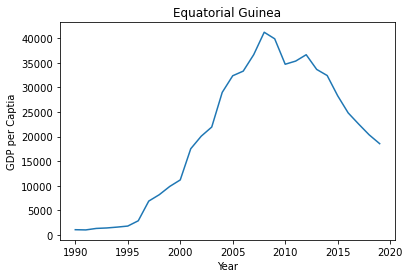

In [15]:
# Equatorial Guinea
gdp_High = gdp_df.loc[gdp_df['Country'] == 'Equatorial Guinea']
plt.plot(gdp_High["Year"], gdp_High["GDP_Per_Capita"])
plt.xlabel("Year")
plt.ylabel("GDP per Captia")
plt.title("Equatorial Guinea")

Text(0.5, 1.0, 'China')

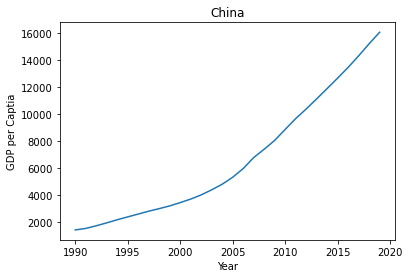

In [16]:
# China
gdp_High2 = gdp_df.loc[gdp_df['Country'] == 'China']
plt.plot(gdp_High2["Year"], gdp_High2["GDP_Per_Capita"])
plt.xlabel("Year")
plt.ylabel("GDP per Captia")
plt.title("China")

### Part 17
Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [17]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


### Part 18
- Merge gdp_df and continents. 
- Keep only the countries that appear in both data frames. 
- Save the result back to gdp_df.

In [18]:
gdp_df = pd.merge(left = continents, 
         right = gdp_df, 
         left_on = 'Country', 
         right_on = 'Country')
print(gdp_df)

     Continent      Country  Year  GDP_Per_Capita
0         Asia  Afghanistan  2019     2065.036398
1         Asia  Afghanistan  2018     2033.779002
2         Asia  Afghanistan  2017     2058.383832
3         Asia  Afghanistan  2016     2057.062164
4         Asia  Afghanistan  2015     2068.265904
...        ...          ...   ...             ...
5438    Africa     Zimbabwe  1994     3263.934978
5439    Africa     Zimbabwe  1993     3033.504852
5440    Africa     Zimbabwe  1992     3054.889178
5441    Africa     Zimbabwe  1991     3426.598094
5442    Africa     Zimbabwe  1990     3324.348171

[5443 rows x 4 columns]


### Part 19. 
Determine the number of countries per continent. Create a bar chart showing this.
- Africa: 49
- Asia: 43
- Europe: 45
- North America: 26
- Oceania: 14
- South America: 11

In [19]:
CPC = gdp_df.groupby('Continent')['Country'].nunique()
print(CPC)

Continent
Africa           49
Asia             43
Europe           45
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'Oceania'),
  Text(5, 0, 'South America')])

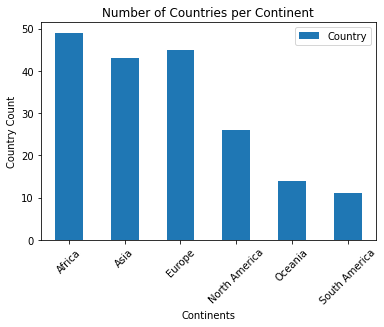

In [20]:
CPC.plot(kind = 'bar');
plt.xlabel("Continents")
plt.ylabel("Country Count")
plt.title("Number of Countries per Continent")
plt.legend()
plt.xticks(rotation=45)

**Part 20** Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?
- In Asia, during 2014, there seems to be a larger group of countries who's upper GDP are statistical outliers.  There also appear to be outliers among the outliers of Asian countries in terms of GDP.

In [21]:
SNSBox = gdp_df #.set_index("Continent")
(SNSBox[SNSBox['Year'].isin([2014])]).pivot_table(values='GDP_Per_Capita', index='Continent', columns="Country", margins_name="all").stack().dropna()


Continent      Country     
Africa         Algeria         11512.705405
               Angola           8239.828837
               Benin            2975.853914
               Botswana        17264.437133
               Burkina Faso     1907.950515
                                   ...     
South America  Guyana          11244.312669
               Paraguay        11612.389911
               Peru            11877.084063
               Suriname        18187.183961
               Uruguay         20582.168953
Length: 188, dtype: float64

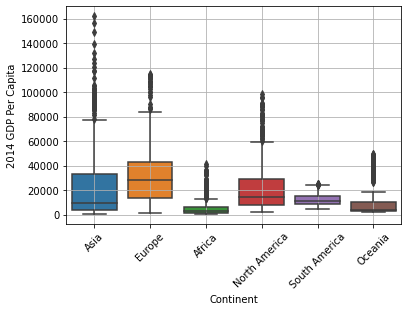

In [22]:
sns.boxplot(x = SNSBox["Continent"], y = SNSBox['GDP_Per_Capita']);
plt.ylabel("2014 GDP Per Capita")
plt.xticks(rotation=45)
plt.grid()

**Part 21**
Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`.

In [23]:
life_expectancy = (
    pd.read_csv(
        '../data/life_expectancy.csv',
        skiprows=4)
)

In [24]:
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN


**Part 22.**
Drop the Country Code, Indicator Name, and Indicator Code columns. Then use `.melt()` to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [25]:
life_expectancy = (
    life_expectancy
        .drop(columns = [
            'Country Code',
            'Indicator Name',
            'Indicator Code'])
        .melt(
            id_vars = 'Country Name',
            var_name = 'Year',
            value_name = 'life_expectancy')
        .rename(
            columns = {
                'Country Name' : 'Country',
                'Year' : 'Year',
                'life_expectancy' : 'Life_Expectancy'})
        .dropna())
life_expectancy.head()

,Country,Year,Life_Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000


In [26]:
life_expectancy.info

<bound method DataFrame.info of                            Country  Year  Life_Expectancy
0                            Aruba  1960        65.662000
1      Africa Eastern and Southern  1960        42.716053
2                      Afghanistan  1960        32.446000
3       Africa Western and Central  1960        37.205380
4                           Angola  1960        37.524000
...                            ...   ...              ...
16221                       Kosovo  2020        71.087805
16222                  Yemen, Rep.  2020        66.181000
16223                 South Africa  2020        64.379000
16224                       Zambia  2020        64.194000
16225                     Zimbabwe  2020        61.738000

[14858 rows x 3 columns]>

**Part 23.** What was the first country with a life expectancy to exceed 80?

In [27]:
life_expectancy.loc['Life_Expectancy' >= 80]

TypeError: '>=' not supported between instances of 'str' and 'int'

**Part 24.** Merge `gdp_per_capita` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

**Part 25.** Create a new DataFrame, named `gdp_le_2019` by extracting data for the year 2019 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2019?

**Part 26.** Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

**Part 27.** Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

**Part 28.** Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

**Part 29.** Add a column to `gdp_le_2019` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.